<a href="https://colab.research.google.com/github/Amanm22/stock-price-prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Import Modules

In [ ]:
pip install torch==2.1.0

In [ ]:
pip install pandas==1.5.3

In [ ]:
pip install fastapi kaleido python-multipart uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.19.2 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.0 which is incompatible.
tensorflow-probability 0.22.0 requires typing-extens

In [ ]:
!pip3 install git+https://github.com/ourownstory/neural_prophet.git

  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-dmblv260
  Running command git clone --filter=blob:none --quiet https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-dmblv260
  Resolved https://github.com/ourownstory/neural_prophet.git to commit 305de42ca6a69447a7055b94813394745dc55a9d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from neuralprophet import NeuralProphet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Read and Preprocess the Data

In [ ]:
stock_symbol = 'GODREJIND.NS' #Samsung
start_date = '2015-01-01'
end_date = '2024-01-28'

stock_data = yf.download(stock_symbol, start = start_date, end=end_date)

print(stock_data.head())
stock_data.to_csv('stock_data.csv')

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2015-01-01  293.764984  295.163879  291.316956  291.916473  286.782867  110501
2015-01-02  292.016388  298.261383  292.016388  295.313751  290.120453  291745
2015-01-05  295.000000  299.500000  292.100006  294.799988  289.615692  160846
2015-01-06  290.000000  294.049988  272.950012  278.700012  273.798828  292057
2015-01-07  278.000000  280.950012  273.000000  277.200012  272.325256  192734


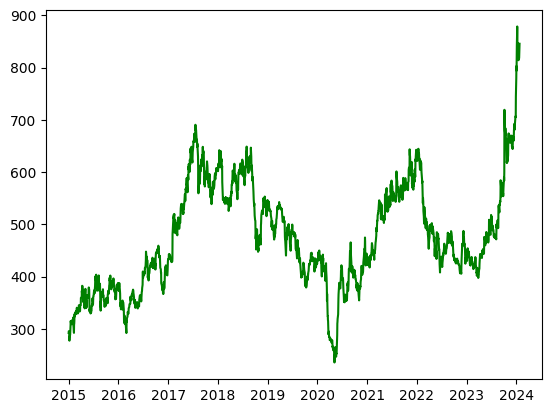

In [ ]:
stocks = pd.read_csv('stock_data.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks = stocks[['Date', 'Close']]
stocks.columns = ['ds', 'y']

plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.show()

# Train the Model

In [ ]:
stocks.head

<bound method NDFrame.head of              ds           y
0    2015-01-01  291.916473
1    2015-01-02  295.313751
2    2015-01-05  294.799988
3    2015-01-06  278.700012
4    2015-01-07  277.200012
...         ...         ...
2235 2024-01-19  817.799988
2236 2024-01-22  817.799988
2237 2024-01-23  825.650024
2238 2024-01-24  828.400024
2239 2024-01-25  845.500000

[2240 rows x 2 columns]>

In [ ]:
model = NeuralProphet()
model.fit(stocks)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.643% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.643% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one datafra

Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,322.773926,395.866547,0.478173,0.0,0
1,254.831696,312.079132,0.357144,0.0,1
2,199.854691,242.783936,0.258503,0.0,2
3,158.635132,190.193695,0.183513,0.0,3
4,127.891281,151.133286,0.131214,0.0,4
...,...,...,...,...,...
148,40.831753,55.957283,0.026789,0.0,148
149,40.859768,56.349232,0.026802,0.0,149
150,40.860046,56.135967,0.026810,0.0,150
151,40.880169,56.248951,0.026810,0.0,151


# Evaluate the Model

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.643% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.643% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Predicting: 35it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.643% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.643% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.in

Predicting: 35it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


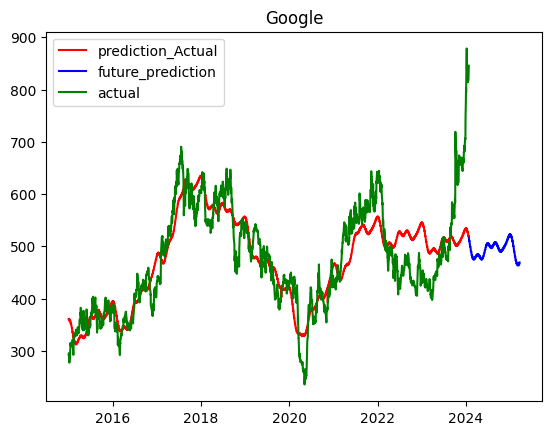

In [ ]:
future = model.make_future_dataframe(stocks, periods = 300)

forecast = model.predict(future)
actual_prediction = model.predict(stocks)

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = "prediction_Actual", c = 'r')
plt.plot(forecast['ds'], forecast['yhat1'], label = 'future_prediction', c = 'b')
plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.legend()
plt.title('Google')
plt.show()

In [ ]:
model.plot_components(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:272: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:398: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old beh

In [ ]:
forecast['yhat1']

0      515.643616
1      509.769104
2      510.626648
3      508.511169
4      508.332458
          ...    
295    465.713196
296    465.006348
297    467.638947
298    467.357391
299    469.027893
Name: yhat1, Length: 300, dtype: float32